In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots


In [3]:
path = os.getcwd() + "/Framingham.csv"
framingham_df = pd.read_csv(path)
framingham_df.info()
framingham_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   object 
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   int64  
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   int64  
 14  glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [4]:
framingham_df.isna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
framingham_df['education'].unique()

array(['College', 'High school/GED', 'Some high school',
       'Some college/vocational school'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split

fram_train, fram_test = train_test_split(framingham_df, test_size=0.25, random_state=881981)
fram_train.shape, fram_test.shape

((2743, 16), (915, 16))

In [7]:
# How many loans have defaulted?

default_false = np.sum(fram_train['TenYearCHD'] == 0)
default_true = np.sum(fram_train['TenYearCHD'] == 1)

print(pd.Series({'0': default_false, '1': default_true}))

0    2332
1     411
dtype: int64


In [8]:
print('The proportion of TenYearCHD is {}'.format(default_true/(default_true+default_false)))

The proportion of TenYearCHD is 0.14983594604447684


The set is highly imbalanced. We need to be carefull about our conclusion on the efficiency of our model.

In [9]:
x_train,y_train = fram_train.drop(['TenYearCHD','education'], axis =1), fram_train['TenYearCHD']
x_test, y_test = fram_test.drop(['TenYearCHD','education'], axis = 1), fram_test['TenYearCHD']

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
print(model.score(X = x_train, y = y_train))
print(model.score(X = x_test, y = y_test))

0.8523514400291652
0.8437158469945355


In [50]:
model_balanced = LogisticRegression(class_weight = 'balanced')
model_balanced.fit(x_train, y_train)

c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [13]:
print(model_balanced.score(X=x_train, y=y_train))
print(model_balanced.score(X=x_test, y=y_test))

0.6474662777980313
0.6415300546448087


In [14]:
print(model.coef_)
print(model.intercept_)

[[ 5.27103844e-01  3.36969869e-02 -1.61373935e-01  1.64653503e-02
   1.12771310e-01  7.48274122e-02  1.05788046e+00  2.01955401e-01
  -7.81733153e-04  1.31513439e-02 -3.72427093e-02 -4.43975307e-02
  -1.86597761e-02  3.98581353e-03]]
[-0.41823541]


In [15]:
print(model_balanced.coef_)
print(model_balanced.intercept_)

[[ 5.71474915e-01  4.22141534e-02 -7.37418158e-02  1.59132722e-02
   1.03368934e-01  7.89168170e-02  9.79249890e-01  2.11536011e-01
   1.09950164e-05  1.23241320e-02 -3.17761449e-02 -2.60505351e-02
  -1.50487009e-02  3.23562989e-03]]
[-0.36949657]


In [16]:
model.feature_names_in_

array(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'], dtype=object)

In [17]:
print(len(model.coef_[0]))
print(len(model.feature_names_in_))

14
14


In [18]:
def print_model(m) :
    values = m.coef_[0] 
    label = m.feature_names_in_
    s = ''
    for i in range(len(values)) :
        s+= label[i] + ': {} \n'.format(values[i]) 
    s+= 'intercept : {}\n'.format(m.intercept_[0])
    print(s)

In [19]:
print_model(model)

male: 0.5271038440106107 
age: 0.03369698688280772 
currentSmoker: -0.1613739352551721 
cigsPerDay: 0.016465350324407605 
BPMeds: 0.11277131024861976 
prevalentStroke: 0.07482741219485496 
prevalentHyp: 1.0578804632101106 
diabetes: 0.2019554011258695 
totChol: -0.0007817331528594497 
sysBP: 0.013151343874480798 
diaBP: -0.03724270929632248 
BMI: -0.044397530704847414 
heartRate: -0.018659776107040452 
glucose: 0.00398581353420031 
intercept : -0.418235411670338



In [20]:
print_model(model_balanced)

male: 0.5714749153042326 
age: 0.04221415337394474 
currentSmoker: -0.0737418158435482 
cigsPerDay: 0.015913272177787888 
BPMeds: 0.10336893368820967 
prevalentStroke: 0.07891681698249312 
prevalentHyp: 0.9792498904541792 
diabetes: 0.21153601056681262 
totChol: 1.0995016397519968e-05 
sysBP: 0.012324132020302503 
diaBP: -0.0317761449051765 
BMI: -0.026050535119352694 
heartRate: -0.015048700862597438 
glucose: 0.0032356298858295753 
intercept : -0.3694965729031084



In [21]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

y_pred_balanced = model_balanced.predict(x_test)
cm_balanced = confusion_matrix(y_test, y_pred_balanced)

print(cm)
print(cm_balanced)

[[764   5]
 [138   8]]
[[485 284]
 [ 44 102]]


What we can see is that the balanced model has a lot less false positive than the first model.

In [22]:
print('First model TPR is :{}'.format(cm[1,1]/(cm[1,1]+cm[1,0])))
print('Balanced model TPR is :{}'.format(cm_balanced[1,1]/(cm_balanced[1,1]+cm_balanced[1,0])))

First model TPR is :0.0547945205479452
Balanced model TPR is :0.6986301369863014


In [23]:
print('First model FPR is :{}'.format(cm[0,1]/(cm[0,1]+cm[0,0])))
print('Balanced model FPR is :{}'.format(cm_balanced[0,1]/(cm_balanced[0,1]+cm_balanced[0,0])))

First model FPR is :0.006501950585175552
Balanced model FPR is :0.3693107932379714


Let's try the training with education using OneHotEncoder

In [24]:
fram_train['education'].unique()

array(['Some high school', 'High school/GED', 'College',
       'Some college/vocational school'], dtype=object)

In [25]:
dummy = pd.get_dummies(framingham_df['education'], drop_first=True)
fram_encoded = pd.concat([framingham_df, dummy], axis=1).drop('education', axis=1)

In [26]:
fram_encoded.info()
fram_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   male                            3658 non-null   int64  
 1   age                             3658 non-null   int64  
 2   currentSmoker                   3658 non-null   int64  
 3   cigsPerDay                      3658 non-null   int64  
 4   BPMeds                          3658 non-null   int64  
 5   prevalentStroke                 3658 non-null   int64  
 6   prevalentHyp                    3658 non-null   int64  
 7   diabetes                        3658 non-null   int64  
 8   totChol                         3658 non-null   int64  
 9   sysBP                           3658 non-null   float64
 10  diaBP                           3658 non-null   float64
 11  BMI                             3658 non-null   float64
 12  heartRate                       36

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,High school/GED,Some college/vocational school,Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,0,0,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,1,0,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,0,0,1
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,0,1,0
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,0,1,0


In [27]:
df_train_encoded, df_test_encoded = train_test_split(fram_encoded)


In [28]:
x_train_encoded , y_train_encoded = df_train_encoded.drop(['TenYearCHD'], axis = 1), df_train_encoded['TenYearCHD']
x_test_encoded, y_test_encoded = df_test_encoded.drop(['TenYearCHD'], axis = 1), df_test_encoded['TenYearCHD']

In [29]:
encoded_model = LogisticRegression()
balanced_encoded_model = LogisticRegression(class_weight='balanced')

encoded_model.fit(x_train_encoded,y_train_encoded)
balanced_encoded_model.fit(x_train_encoded, y_train_encoded)

c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression(class_weight='balanced')

In [30]:
y_pred_encoded = encoded_model.predict(x_test_encoded)
encoded_cm = confusion_matrix(y_test_encoded, y_pred_encoded)

y_pred_encoded_balanced = balanced_encoded_model.predict(x_test_encoded)
encoded_cm_balanced = confusion_matrix(y_test_encoded, y_pred_encoded_balanced)

print(encoded_cm)
print(encoded_cm_balanced)
print('Encoded model FPR is :{}'.format(encoded_cm[0,1]/(encoded_cm[0,1]+encoded_cm[0,0])))
print('Balanced encoded model FPR is :{}'.format(encoded_cm_balanced[0,1]/(encoded_cm_balanced[0,1]+encoded_cm_balanced[0,0])))

[[761   4]
 [140  10]]
[[476 289]
 [ 46 104]]
Encoded model FPR is :0.00522875816993464
Balanced encoded model FPR is :0.37777777777777777


In [31]:
print(cm)
print(cm_balanced)


[[764   5]
 [138   8]]
[[485 284]
 [ 44 102]]


We can see that the results are the same.
Let's see what happens if we use a different threshold. (threshold of 0.4 instead of default 0.5)


In [34]:
threshold = 0.4

y_prob = model.predict_proba(x_test)
y_pred = y_prob[:, 1] >= threshold
cm_threshold = confusion_matrix(y_test, y_pred)

y_prob_enc = encoded_model.predict_proba(x_test_encoded)
y_pred_enc = y_prob_enc[:,1] >= threshold
cm_enc_threshold = confusion_matrix(y_test_encoded,y_pred_enc)

print('The first model predictions with threshold 0.4 results are :\n{} \n The original was :\n{}\n'.format(cm_threshold,cm))

print('==================================================================\n\n')
print('The model taking into account the education with threshold 0.4 results are :\n{} \nThe original was : \n{}\n'.format(cm_enc_threshold,encoded_cm))


The first model predictions with threshold 0.4 results are :
[[755  14]
 [133  13]] 
 The original was :
[[764   5]
 [138   8]]



The model taking into account the education with threshold 0.4 results are :
[[752  13]
 [133  17]] 
The original was : 
[[761   4]
 [140  10]]



In [36]:
def TPR(confusion_matrix) :
    return confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
def FPR(confusion_matrix) :
    return confusion_matrix[0,1]/(confusion_matrix[0,0]+confusion_matrix[0,1])
def accuracy(confusion_matrix) :
    return (confusion_matrix[0,0]+confusion_matrix[1,1])/sum(confusion_matrix[0]+confusion_matrix[1])

TPR_th = TPR(cm_threshold)
TPR_enc_th = TPR(cm_enc_threshold)
FPR_th = FPR(cm_threshold)
FPR_enc_th = FPR(cm_enc_threshold)

accuracy_th = accuracy(cm_threshold)
accuracy_enc_th = accuracy(cm_enc_threshold)

print('The TPR for the threshold 0.4 is :{} '.format(TPR_th))
print('The FPR for the threshold 0.4 is :{}'.format(FPR_th))
print('The accuracy with threshold 0.4 is  : {}\n'.format(accuracy_th))

print('=================================================\n')

print('The TPR for the mdel using education is :{}'.format(TPR_enc_th))
print('The FPR for the modelu using education is : {} '.format(FPR_enc_th))
print('The accuracy for the model using education is : {}'.format(accuracy_enc_th))

The TPR for the threshold 0.4 is :0.08904109589041095 
The FPR for the threshold 0.4 is :0.018205461638491547
The accuracy with threshold 0.4 is  : 0.839344262295082


The TPR for the mdel using education is :0.11333333333333333
The FPR for the modelu using education is : 0.01699346405228758 
The accuracy for the model using education is : 0.8404371584699454


Both models are performing the same way.

In [40]:
TPR_bal = TPR(cm_balanced)
TPR_bal_enc = TPR(encoded_cm_balanced)
FPR_bal  = FPR(cm_balanced)
FPR_bal_enc = FPR(encoded_cm_balanced)
accuracy_bal = accuracy(cm_balanced)
accuracy_bal_enc = accuracy(encoded_cm_balanced)

In [44]:
print('The TPR for the balanced model is :{} '.format(TPR_bal))
print('The FPR for the balanced model is :{}'.format(FPR_bal))
print('The accuracy of the balanced model is  : {}\n'.format(accuracy_bal))

print('=================================================\n')

print('The TPR for the mdel using education is :{}'.format(TPR_bal_enc))
print('The FPR for the model using education is : {} '.format(FPR_bal_enc))
print('The accuracy for the model using education is : {}'.format(accuracy_bal_enc))

The TPR for the balanced model is :0.6986301369863014 
The FPR for the balanced model is :0.3693107932379714
The accuracy of the balanced model is  : 0.6415300546448087


The TPR for the mdel using education is :0.6933333333333334
The FPR for the model using education is : 0.37777777777777777 
The accuracy for the model using education is : 0.6338797814207651


We can see that both models are performing the same way.
<p>
What we can also see is that they both perform differently than the two model that are not balanced. They perform better with respect to the TPR. Which means that they are more accurate in determining whether someone is a potential subject for developping coronary heart disease.
<p>
The other models that are not balanced are just doing as good as a dummy model would do.

**ROC Curve**

c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


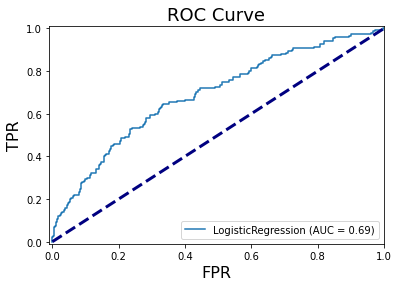

In [45]:
from sklearn.metrics import plot_roc_curve


plot_roc_curve(encoded_model, x_test_encoded, y_test_encoded)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.show()


c:\Users\minon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


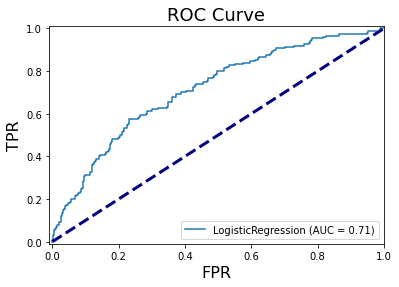

In [54]:
plot_roc_curve(balanced_encoded_model, x_test_encoded, y_test_encoded)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.show()
